In [ ]:
!pip install torch torchvision matplotlib numpy


Design and implement Deep Convolutional GAN to generate images of faces/digits from a
set of given images


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
subset = Subset(mnist, range(1000))  # Use only 1000 samples

dataloader = DataLoader(subset, batch_size=64, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.69MB/s]


In [3]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 128, 7, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128*7*7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [4]:
latent_dim = 100
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


Epoch [1/50] | Loss_D: 6.3742 | Loss_G: 33.9944
Epoch [2/50] | Loss_D: 6.8241 | Loss_G: 34.7008
Epoch [3/50] | Loss_D: 6.5536 | Loss_G: 36.3894
Epoch [4/50] | Loss_D: 6.1245 | Loss_G: 34.6627
Epoch [5/50] | Loss_D: 7.7931 | Loss_G: 34.1847
Epoch [6/50] | Loss_D: 6.0563 | Loss_G: 35.3663
Epoch [7/50] | Loss_D: 7.4237 | Loss_G: 36.5031
Epoch [8/50] | Loss_D: 6.2845 | Loss_G: 35.6504
Epoch [9/50] | Loss_D: 6.3580 | Loss_G: 36.2528
Epoch [10/50] | Loss_D: 6.2500 | Loss_G: 36.9208


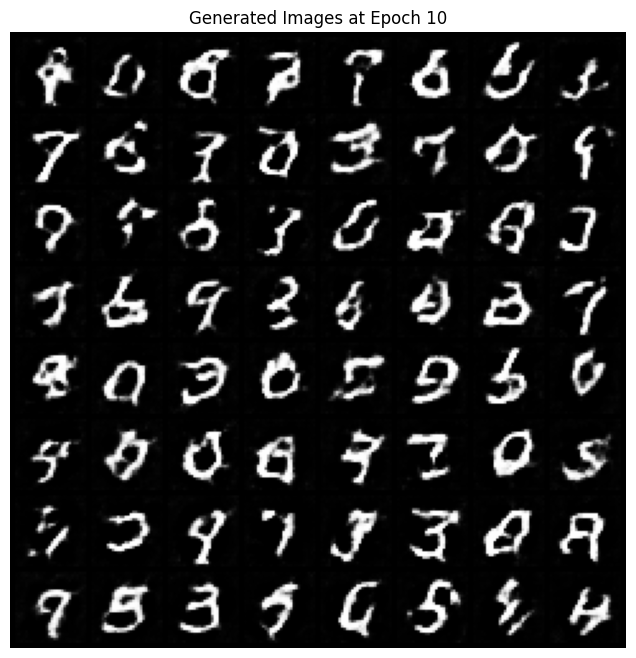

Epoch [11/50] | Loss_D: 5.9863 | Loss_G: 35.7633
Epoch [12/50] | Loss_D: 5.6340 | Loss_G: 37.5403
Epoch [13/50] | Loss_D: 10.2609 | Loss_G: 37.5511
Epoch [14/50] | Loss_D: 5.9645 | Loss_G: 33.7998
Epoch [15/50] | Loss_D: 4.7574 | Loss_G: 37.3553
Epoch [16/50] | Loss_D: 5.1099 | Loss_G: 36.9479
Epoch [17/50] | Loss_D: 5.9390 | Loss_G: 38.6382
Epoch [18/50] | Loss_D: 5.2605 | Loss_G: 38.7444
Epoch [19/50] | Loss_D: 5.9614 | Loss_G: 39.3699
Epoch [20/50] | Loss_D: 5.6678 | Loss_G: 37.8967


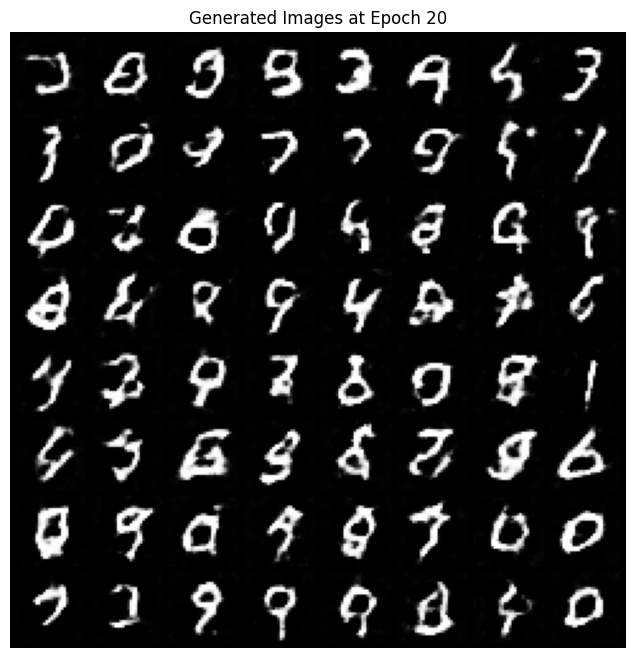

Epoch [21/50] | Loss_D: 5.8192 | Loss_G: 38.4953
Epoch [22/50] | Loss_D: 5.7070 | Loss_G: 37.0958
Epoch [23/50] | Loss_D: 5.6800 | Loss_G: 38.9984
Epoch [24/50] | Loss_D: 5.4303 | Loss_G: 39.1037
Epoch [25/50] | Loss_D: 5.2710 | Loss_G: 38.9802
Epoch [26/50] | Loss_D: 5.3280 | Loss_G: 40.5334
Epoch [27/50] | Loss_D: 4.9451 | Loss_G: 39.5384
Epoch [28/50] | Loss_D: 9.8411 | Loss_G: 39.5761
Epoch [29/50] | Loss_D: 5.4282 | Loss_G: 37.6068
Epoch [30/50] | Loss_D: 4.8557 | Loss_G: 38.5605


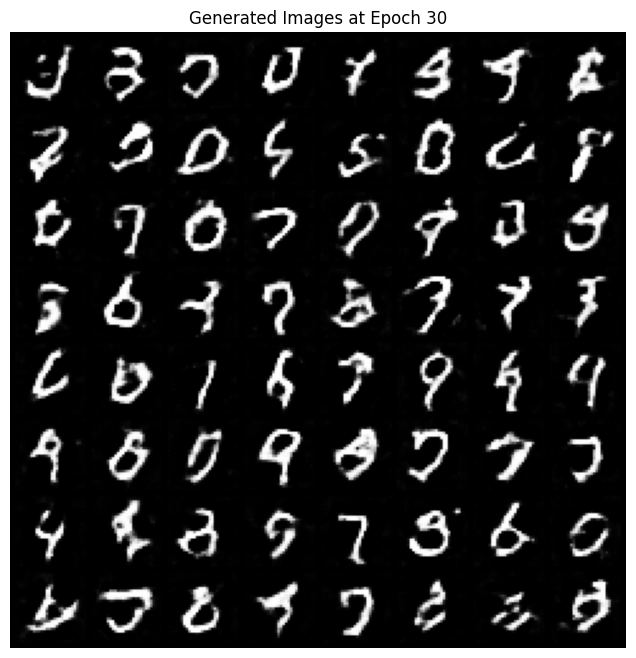

Epoch [31/50] | Loss_D: 7.7552 | Loss_G: 39.1984
Epoch [32/50] | Loss_D: 4.9803 | Loss_G: 39.2764
Epoch [33/50] | Loss_D: 4.5491 | Loss_G: 40.8923
Epoch [34/50] | Loss_D: 4.2181 | Loss_G: 41.5169
Epoch [35/50] | Loss_D: 4.4461 | Loss_G: 41.3373
Epoch [36/50] | Loss_D: 4.3013 | Loss_G: 42.1789
Epoch [37/50] | Loss_D: 4.2753 | Loss_G: 42.9946
Epoch [38/50] | Loss_D: 7.0230 | Loss_G: 38.9690
Epoch [39/50] | Loss_D: 3.9415 | Loss_G: 42.3462
Epoch [40/50] | Loss_D: 4.4593 | Loss_G: 41.4616


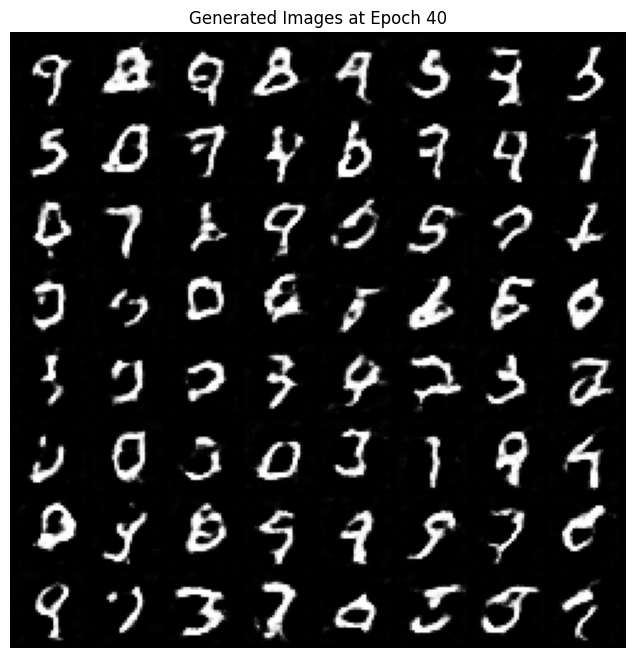

Epoch [41/50] | Loss_D: 5.2499 | Loss_G: 42.7407
Epoch [42/50] | Loss_D: 5.0131 | Loss_G: 42.3010
Epoch [43/50] | Loss_D: 4.3066 | Loss_G: 41.9835
Epoch [44/50] | Loss_D: 7.0227 | Loss_G: 42.2959
Epoch [45/50] | Loss_D: 4.5512 | Loss_G: 42.3139
Epoch [46/50] | Loss_D: 4.6771 | Loss_G: 42.4508
Epoch [47/50] | Loss_D: 6.2967 | Loss_G: 45.4019
Epoch [48/50] | Loss_D: 13.2253 | Loss_G: 32.2163
Epoch [49/50] | Loss_D: 5.6803 | Loss_G: 36.7043
Epoch [50/50] | Loss_D: 5.6250 | Loss_G: 38.0791


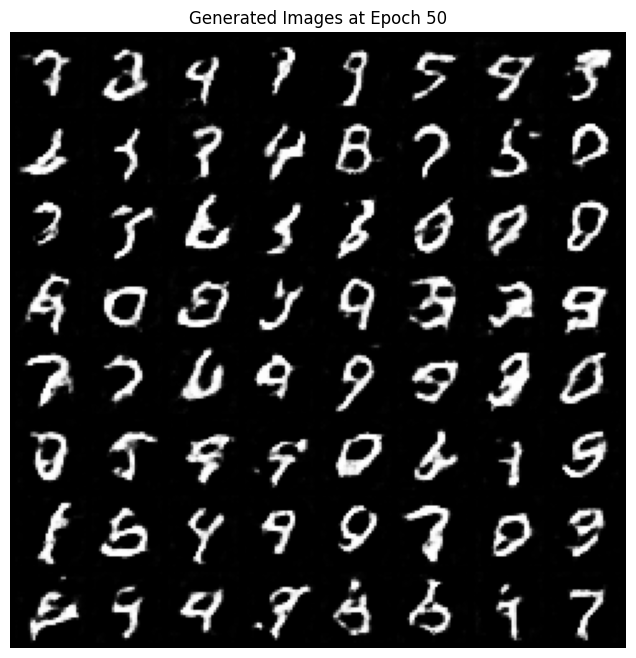

In [8]:
epochs = 50
losses_g, losses_d = [], []

# Function to visualize generated images at specific intervals
def show_generated_images(epoch):
    noise = torch.randn(64, latent_dim, 1, 1).to(device)
    fake_images = generator(noise)
    show_images(fake_images, f"Generated Images at Epoch {epoch + 1}")

for epoch in range(epochs):
    loss_g_epoch = 0
    loss_d_epoch = 0
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim, 1, 1).to(device)
        fake_imgs = generator(z)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        loss_d = real_loss + fake_loss
        loss_d.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_loss = criterion(discriminator(fake_imgs), real_labels)
        gen_loss.backward()
        optimizer_G.step()

        loss_g_epoch += gen_loss.item()
        loss_d_epoch += loss_d.item()

    losses_g.append(loss_g_epoch / len(dataloader))
    losses_d.append(loss_d_epoch / len(dataloader))
    print(f"Epoch [{epoch+1}/{epochs}] | Loss_D: {loss_d_epoch:.4f} | Loss_G: {loss_g_epoch:.4f}")

    # Show generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        show_generated_images(epoch)


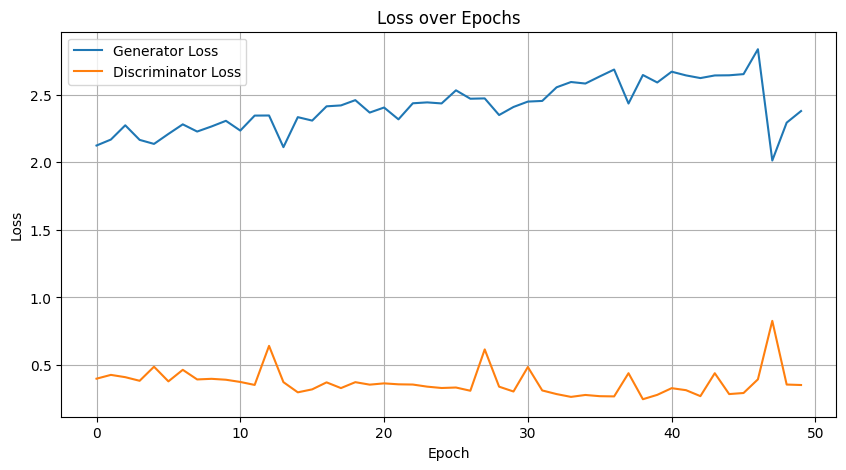

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(losses_g, label="Generator Loss")
plt.plot(losses_d, label="Discriminator Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


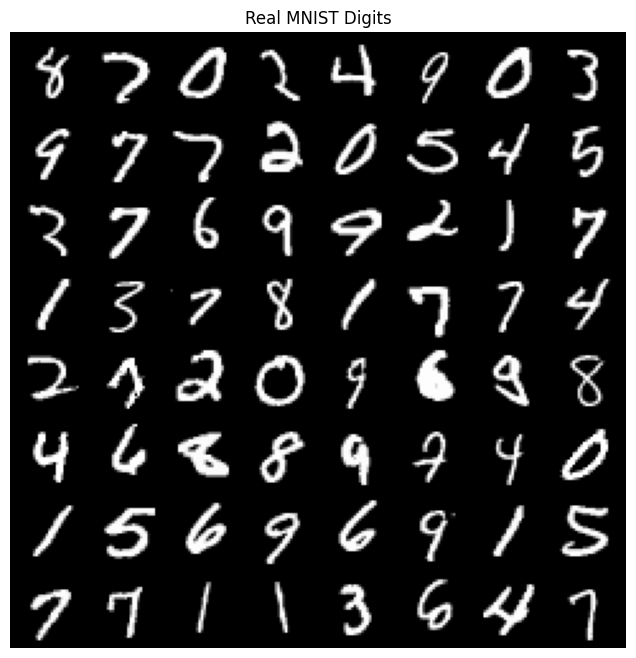

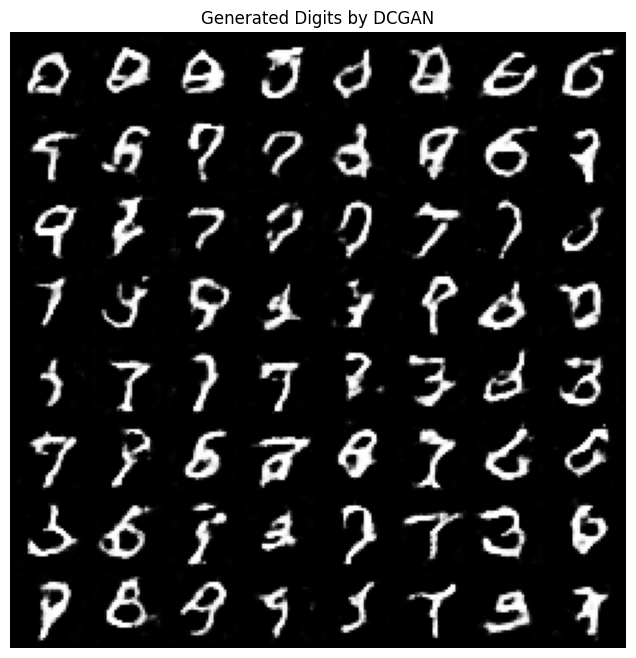

In [9]:
def show_images(imgs, title):
    imgs = imgs.detach().cpu()
    grid = make_grid(imgs, nrow=8, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.axis("off")
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()

# Real samples
real_batch = next(iter(dataloader))[0][:64]
show_images(real_batch, "Real MNIST Digits")

# Fake samples
noise = torch.randn(64, latent_dim, 1, 1).to(device)
fake_batch = generator(noise)
show_images(fake_batch, "Generated Digits by DCGAN")
